1. Pengenalan & Pra-Pemrosesan Dataset MNIST:

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Muat data MNIST & tampilkan bentuk dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [3]:
#Normalisasi pixel
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
#Reshape
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
#One-hot encode label
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"Shape y_train sebelum encoding: {y_train.shape}")
print(f"Shape y_train setelah encoding: {y_train_cat.shape}")
print(f"5 label pertama setelah encoding: \n{y_train_cat[:5]}")

Shape y_train sebelum encoding: (60000,)
Shape y_train setelah encoding: (60000, 10)
5 label pertama setelah encoding: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


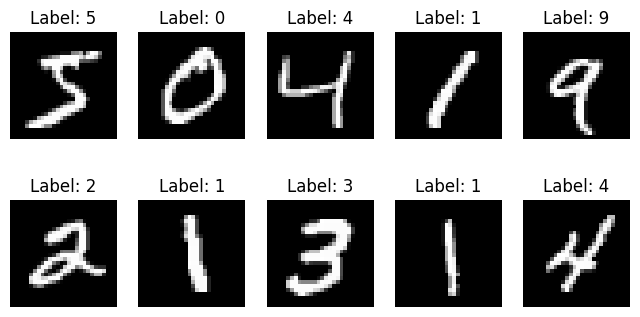

In [6]:
#Visualisasi
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

2. Model CNN dari Nol (Model A):

In [7]:
#Rancang dan bangun sebuah model CNN

#Definisikan input shape
input_shape = (28, 28, 1)

#Jumlah kelas untuk MNIST
num_classes = 10

#Bangun model CNN (Model A)
modelA = Sequential([
    #Layer konvolusi pertama
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    #Layer konvolusi kedua
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    #Flatten fully connected layer
    Flatten(),

    #Fully connected lyer + dropou
    Dense(128, activation='relu'),
    Dropout(0.5),

    #Output layer untuk 10 kelas
    Dense(num_classes, activation='softmax')
])

#Tampilkan ringkasan model
modelA.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Compile model
modelA.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
#Tetapkan parameter pelatihan
batch_size = 128
epochs = 10

#Latih model
print("Mulai pelatihan model...")
history = modelA.fit(x_train, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_cat))
print("Pelatihan selesai.")


Mulai pelatihan model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - accuracy: 0.8018 - loss: 0.6316 - val_accuracy: 0.9813 - val_loss: 0.0617
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9692 - loss: 0.1054 - val_accuracy: 0.9864 - val_loss: 0.0418
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9776 - loss: 0.0759 - val_accuracy: 0.9882 - val_loss: 0.0331
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9825 - loss: 0.0581 - val_accuracy: 0.9904 - val_loss: 0.0281
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9852 - loss: 0.0511 - val_accuracy: 0.9920 - val_loss: 0.0245
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9871 - loss: 0.0435 - val_accuracy: 0.9915 - val_loss: 0.0272
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - accuracy: 0.9892 - loss: 0.0359 - val_accuracy: 0.9912 - val_loss: 0.0274
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - a

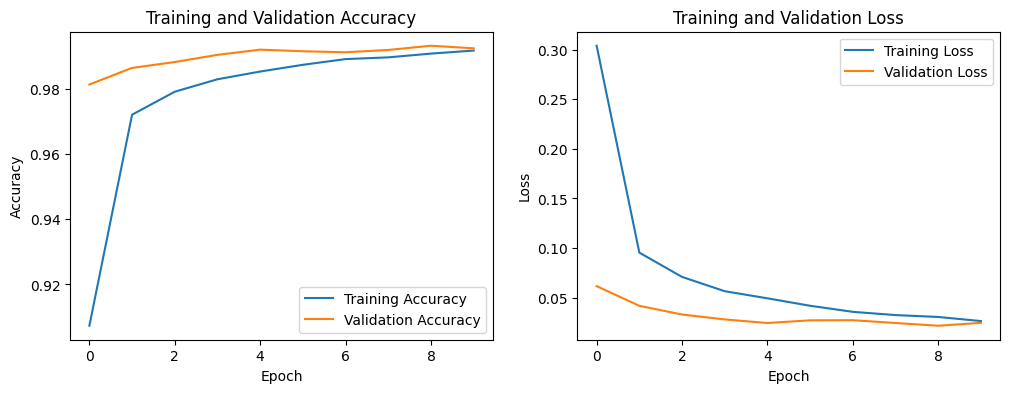

In [10]:
#Plot grafik training history
plt.figure(figsize=(12,4))

#Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


3. Evaluasi Model A dengan Tulisan Tangan Sendiri:

In [11]:
import os
import glob

In [12]:
from google.colab import files
uploaded = files.upload()

Saving 5_10.jpg to 5_10.jpg
Saving 5_09.jpg to 5_09.jpg
Saving 5_08.jpg to 5_08.jpg
Saving 5_07.jpg to 5_07.jpg
Saving 5_06.jpg to 5_06.jpg
Saving 5_05.jpg to 5_05.jpg
Saving 5_04.jpg to 5_04.jpg
Saving 5_03.jpg to 5_03.jpg
Saving 5_02.jpg to 5_02.jpg
Saving 11_10.jpg to 11_10.jpg
Saving 11_09.jpg to 11_09.jpg
Saving 11_08.jpg to 11_08.jpg
Saving 11_07.jpg to 11_07.jpg
Saving 11_06.jpg to 11_06.jpg
Saving 11_05.jpg to 11_05.jpg
Saving 11_04.jpg to 11_04.jpg
Saving 11_03.jpg to 11_03.jpg
Saving 11_02.jpg to 11_02.jpg
Saving 1_10.jpg to 1_10.jpg
Saving 1_09.jpg to 1_09.jpg
Saving 1_08.jpg to 1_08.jpg
Saving 1_07.jpg to 1_07.jpg
Saving 1_06.jpg to 1_06.jpg
Saving 1_05.jpg to 1_05.jpg
Saving 1_04.jpg to 1_04.jpg
Saving 1_03.jpg to 1_03.jpg
Saving 1_02.jpg to 1_02.jpg
Saving 1_01.jpg to 1_01.jpg
Saving 11_01.jpg to 11_01.jpg
Saving 5_01.jpg to 5_01.jpg


In [13]:
#Pre-proccessing gambar
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

def preprocess_handwriting(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Gagal membaca file: {path}")
        return None

    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=(0, -1))  # (1,28,28,1)
    return img


files = sorted([f for f in os.listdir() if f.endswith(".jpg")])

x_hand = []
y_hand = []

for file in files:
    label = int(file.split('_')[0].replace('11', '1'))
    img = preprocess_handwriting(file)

    if img is not None:
        x_hand.append(img[0])
        y_hand.append(label)

x_hand = np.array(x_hand)
y_hand = np.array(y_hand)

print("Jumlah citra tulisan tangan:", len(x_hand))
print("Ukuran data:", x_hand.shape)

Jumlah citra tulisan tangan: 30
Ukuran data: (30, 28, 28, 1)


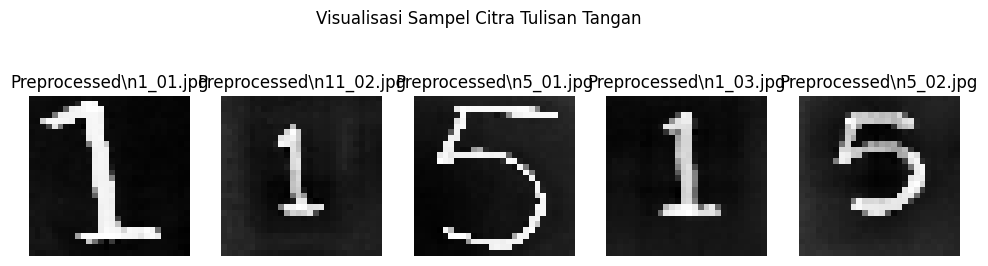

In [14]:
#Visualisasi 3-5 gambar
sample_paths = [
    "1_01.jpg",
    "11_02.jpg",
    "5_01.jpg",
    "1_03.jpg",
    "5_02.jpg"
]

plt.figure(figsize=(12, 3))
for i, path in enumerate(sample_paths):
    processed = preprocess_handwriting(path)

    if processed is not None:
        plt.subplot(1, 5, i+1)
        plt.imshow(processed[0, :, :, 0], cmap='gray')
        plt.title(f"Preprocessed\\n{path}")
        plt.axis('off')

plt.suptitle("Visualisasi Sampel Citra Tulisan Tangan", y=1.05)
plt.show()

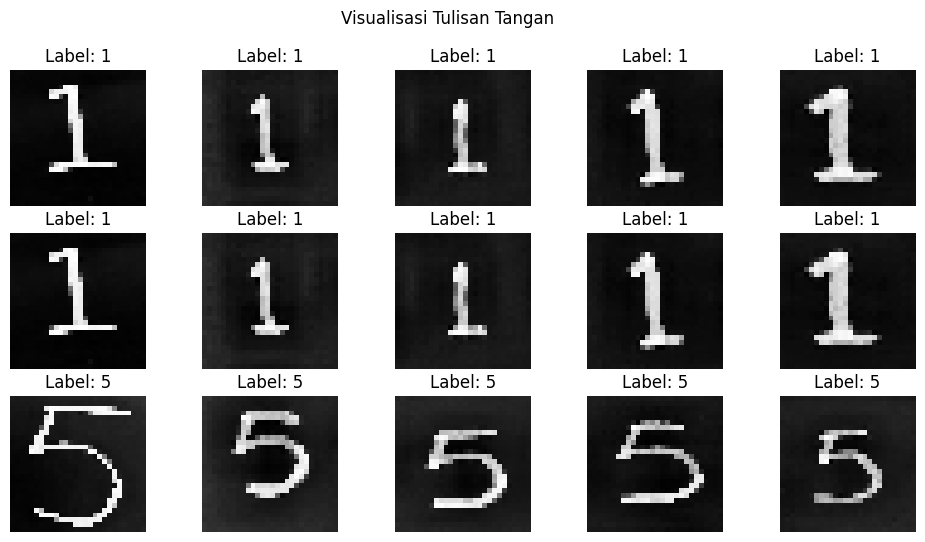

In [15]:
#Visualisasi NIM tulisan tangan
nim_digits = [1, 1, 5]

plt.figure(figsize=(12, 6))

for idx, digit in enumerate(nim_digits):
    indices = [i for i, label in enumerate(y_hand) if label == digit]

    plt.subplot(len(nim_digits), 5, idx*5 + 1)
    for j in range(5):
        plt.subplot(len(nim_digits), 5, idx*5 + j + 1)
        plt.imshow(x_hand[indices[j]].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {digit}")
        plt.axis('off')

plt.suptitle("Visualisasi Tulisan Tangan")
plt.show()


In [16]:
#Evaluasi model
score = modelA.evaluate(x_test, y_test_cat, verbose=0)

print('-' * 40)
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]*100:.2f}%")
print('-' * 40)

----------------------------------------
Test Loss: 0.0247
Test Accuracy: 99.24%
----------------------------------------


In [17]:
#Prediksi
pred_probs = modelA.predict(x_hand)
pred_labels = np.argmax(pred_probs, axis=1)

#Evaluasi hasil prediksi
for i in range(len(pred_labels)):
    status = "Benar" if pred_labels[i] == y_hand[i] else "Salah"
    print(f"Citra ke-{i+1} (angka {y_hand[i]}): Prediksi model: {pred_labels[i]} ({status})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Citra ke-1 (angka 1): Prediksi model: 1 (Benar)
Citra ke-2 (angka 1): Prediksi model: 1 (Benar)
Citra ke-3 (angka 1): Prediksi model: 1 (Benar)
Citra ke-4 (angka 1): Prediksi model: 1 (Benar)
Citra ke-5 (angka 1): Prediksi model: 1 (Benar)
Citra ke-6 (angka 1): Prediksi model: 1 (Benar)
Citra ke-7 (angka 1): Prediksi model: 1 (Benar)
Citra ke-8 (angka 1): Prediksi model: 1 (Benar)
Citra ke-9 (angka 1): Prediksi model: 1 (Benar)
Citra ke-10 (angka 1): Prediksi model: 1 (Benar)
Citra ke-11 (angka 1): Prediksi model: 1 (Benar)
Citra ke-12 (angka 1): Prediksi model: 1 (Benar)
Citra ke-13 (angka 1): Prediksi model: 1 (Benar)
Citra ke-14 (angka 1): Prediksi model: 1 (Benar)
Citra ke-15 (angka 1): Prediksi model: 1 (Benar)
Citra ke-16 (angka 1): Prediksi model: 1 (Benar)
Citra ke-17 (angka 1): Prediksi model: 1 (Benar)
Citra ke-18 (angka 1): Prediksi model: 1 (Benar)
Citra ke-19 (angka 1): Prediksi model: 1 (Benar)
Citra ke-20 (angka 1): Prediksi model: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Menampilkan 5 contoh prediksi yang salah:


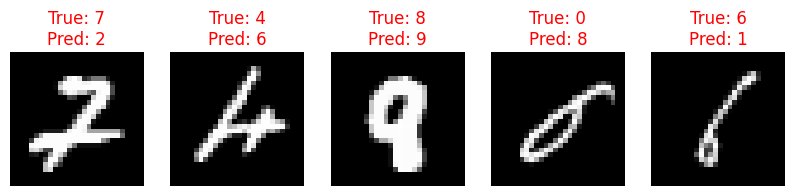

In [18]:
#Indeks gambar yang diprediksi salah
y_pred_cat = modelA.predict(x_test)
y_pred = np.argmax(y_pred_cat, axis=1)

misclassified_indices = np.where(y_pred != y_test)[0]
np.random.shuffle(misclassified_indices)
display_count = min(5, len(misclassified_indices))

plt.figure(figsize=(10, 2))
print(f"Menampilkan {display_count} contoh prediksi yang salah:")
for i in range(display_count):
    idx = misclassified_indices[i]
    plt.subplot(1, display_count, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", color='red')
    plt.axis('off')

plt.show()


4. Implementasi Transfer Learning (Model B)

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [20]:
#Mengubah data MNIST jadi 3 channel
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb  = np.repeat(x_test, 3, axis=-1)

#Resize
x_train_mob = np.array([tf.image.resize(img, (64,64)).numpy() for img in x_train_rgb])
x_test_mob  = np.array([tf.image.resize(img, (64,64)).numpy() for img in x_test_rgb])

print("Ukuran data trained setelah resize:", x_train_mob.shape)
print("Ukuran data tested setelah resize:", x_test_mob.shape)

Ukuran data trained setelah resize: (60000, 64, 64, 3)
Ukuran data tested setelah resize: (10000, 64, 64, 3)


In [23]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))

#Freeze
for layer in base_model.layers:
    layer.trainable = False

#Menambahkan lapisan
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
preds = Dense(10, activation='softmax')(x)

#Bentuk model lengkap
modelB = Model(inputs=base_model.input, outputs=preds)

#Compile
modelB.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelB.summary()


/tmp/ipython-input-2244132865.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
# Tetapkan parameter pelatihan
batch_size = 128
epochs = 10

# Latih model
print("Mulai pelatihan model MobileNetV2...")
historyB = modelB.fit(
    x_train_mob, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)
print("Pelatihan selesai.")

Mulai pelatihan model MobileNetV2...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 192s 497ms/step - accuracy: 0.6442 - loss: 1.1144 - val_accuracy: 0.9117 - val_loss: 0.3319
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 187s 498ms/step - accuracy: 0.8798 - loss: 0.3938 - val_accuracy: 0.9253 - val_loss: 0.2670
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 188s 501ms/step - accuracy: 0.8971 - loss: 0.3356 - val_accuracy: 0.9311 - val_loss: 0.2418
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 202s 502ms/step - accuracy: 0.9040 - loss: 0.3138 - val_accuracy: 0.9343 - val_loss: 0.2253
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 196s 486ms/step - accuracy: 0.9059 - loss: 0.2982 - val_accuracy: 0.9366 - val_loss: 0.2161
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 209s 505ms/step - accuracy: 0.9072 - loss: 0.2884 - val_accuracy: 0.9359 - val_loss: 0.2130
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 183s 488ms/step - accuracy: 0.9095 - loss: 0.2864 - val_accuracy: 0.9375 - val_loss: 0.2070
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━

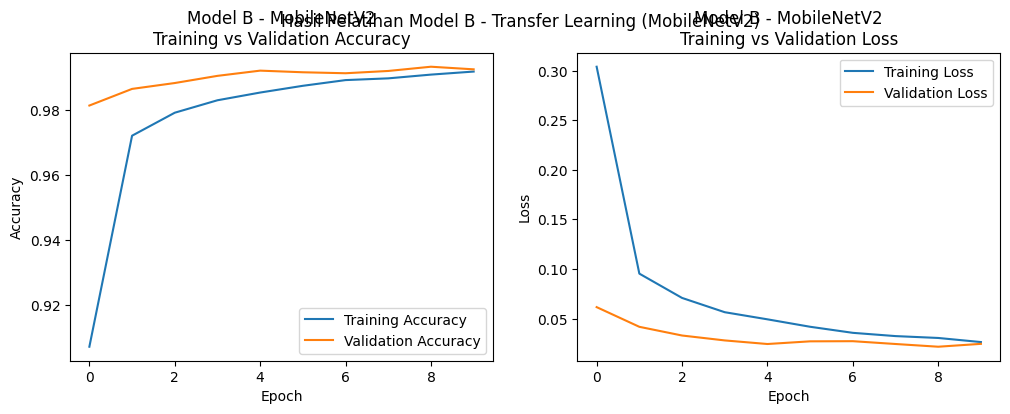

In [29]:
#Plot grafik training history
plt.figure(figsize=(12,4))

#Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model B - MobileNetV2\nTraining vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model B - MobileNetV2\nTraining vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Hasil Pelatihan Model B - Transfer Learning (MobileNetV2)")
plt.show()

5. Evaluasi Model B dengan Tulisan Tangan Sendiri

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2, glob

In [31]:
#Compile
modelB.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
#Evaluasi
print("Evaluasi Model B pada data uji MNIST...")
score = modelB.evaluate(x_test_mob, y_test, verbose=1)

print(f"Test Loss      : {score[0]:.4f}")
print(f"Test Accuracy  : {score[1]*100:.2f}%")
print("----------------------------------------")

Evaluasi Model B pada data uji MNIST...
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.0992 - loss: 2.4933
Test Loss      : 2.5037
Test Accuracy  : 9.54%
----------------------------------------


In [34]:
#Prediksi citra
image_paths = sorted(glob.glob("/content/*.jpg"))
image_paths = [p for p in image_paths if ("1_" in p or "5_" in p)]
print(f"\nJumlah citra tulisan tangan yang dibaca: {len(image_paths)}")

x_hand, y_hand = [], []
for path in image_paths:
    label = int(path.split("/")[-1].split("_")[0])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64,64))
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype("float32") / 255.0
    x_hand.append(img)
    y_hand.append(label)

x_hand = np.array(x_hand)
y_hand = np.array(y_hand)

print("Ukuran data tulisan tangan:", x_hand.shape)


Jumlah citra tulisan tangan yang dibaca: 30
Ukuran data tulisan tangan: (30, 64, 64, 3)


In [35]:
#Prediksi & Akurasi
pred_probs = modelB.predict(x_hand)
pred_labels = np.argmax(pred_probs, axis=1)

#Menampilkan hasil prediksi per citra
benar = 0
for i in range(len(pred_labels)):
    status = "Benar" if pred_labels[i] == y_hand[i] else "Salah"
    print(f"Citra ke-{i+1} (angka {y_hand[i]}): Prediksi model: {pred_labels[i]} ({status})")
    if pred_labels[i] == y_hand[i]:
        benar += 1

akurasi_tulisan = benar / len(pred_labels) * 100
print(f"\nAkurasi Model B pada tulisan tangan (angka 1,1,5): {akurasi_tulisan:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Citra ke-1 (angka 11): Prediksi model: 6 (Salah)
Citra ke-2 (angka 11): Prediksi model: 1 (Salah)
Citra ke-3 (angka 11): Prediksi model: 7 (Salah)
Citra ke-4 (angka 11): Prediksi model: 1 (Salah)
Citra ke-5 (angka 11): Prediksi model: 1 (Salah)
Citra ke-6 (angka 11): Prediksi model: 7 (Salah)
Citra ke-7 (angka 11): Prediksi model: 7 (Salah)
Citra ke-8 (angka 11): Prediksi model: 7 (Salah)
Citra ke-9 (angka 11): Prediksi model: 6 (Salah)
Citra ke-10 (angka 11): Prediksi model: 0 (Salah)
Citra ke-11 (angka 1): Prediksi model: 6 (Salah)
Citra ke-12 (angka 1): Prediksi model: 6 (Salah)
Citra ke-13 (angka 1): Prediksi model: 1 (Benar)
Citra ke-14 (angka 1): Prediksi model: 1 (Benar)
Citra ke-15 (angka 1): Prediksi model: 1 (Benar)
Citra ke-16 (angka 1): Prediksi model: 1 (Benar)
Citra ke-17 (angka 1): Prediksi model: 1 (Benar)
Citra ke-18 (angka 1): Prediksi model: 1 (Benar)
Citra ke-19 (angka 1): Prediksi model: 6 (Salah)
Citra ke-20 (angka 1): Predik

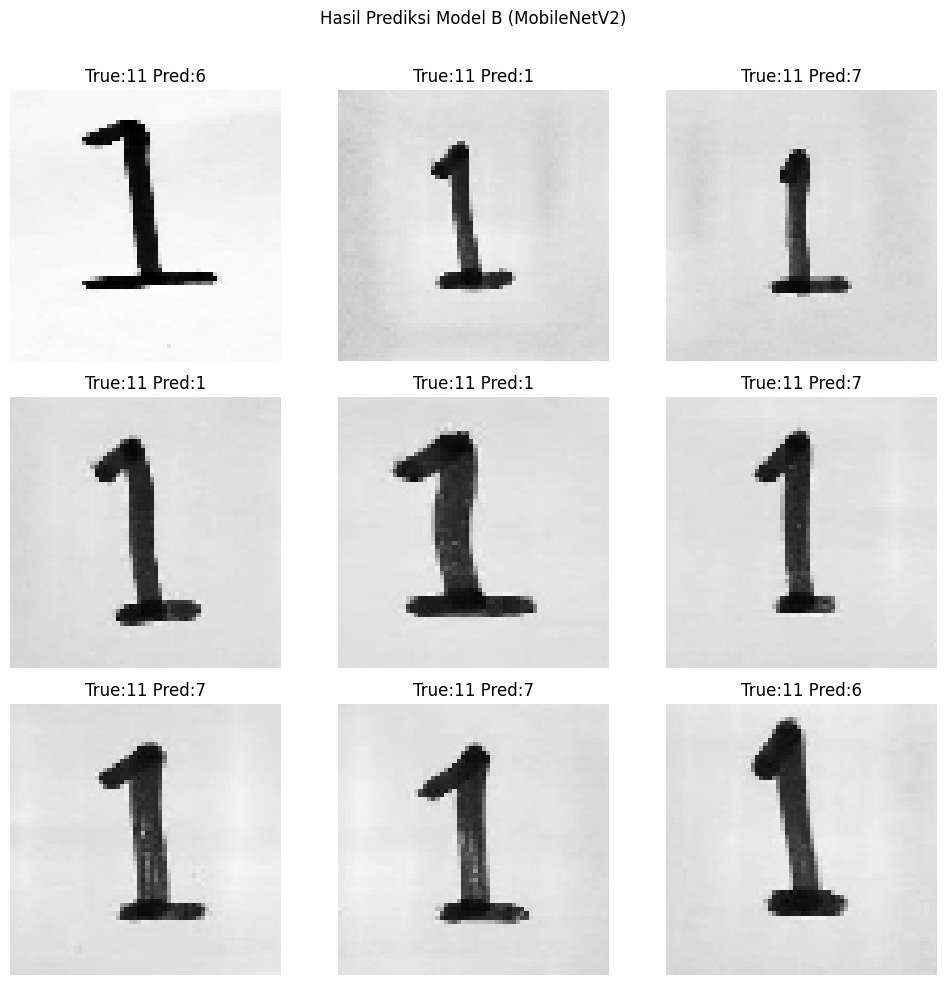

In [36]:
#Visualiasi
plt.figure(figsize=(10,10))
for i in range(min(9, len(x_hand))):
    plt.subplot(3,3,i+1)
    plt.imshow(x_hand[i])
    plt.title(f"True:{y_hand[i]} Pred:{pred_labels[i]}")
    plt.axis("off")

plt.suptitle("Hasil Prediksi Model B (MobileNetV2)")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
